<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [9]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house = pd.read_csv("../../../IOD/DATA/Sacramento_transactions.csv")

In [3]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [115]:
house.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [81]:
house[house['sq__ft']==0].sort_values(by='sq__ft')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,bed_baths
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880,0
598,19 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885376,-121.289414,0
599,15 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885571,-121.289421,0
600,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436,0
601,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,2809 LOON CT,CAMERON PARK,95682,CA,4,2,0,Residential,Mon May 19 00:00:00 EDT 2008,423000,38.687072,-121.004729,6
537,5746 GELSTON WAY,EL DORADO HILLS,95762,CA,4,3,0,Residential,Mon May 19 00:00:00 EDT 2008,471000,38.677015,-121.034083,7
540,719 BAYWOOD CT,EL DORADO HILLS,95762,CA,5,3,0,Residential,Mon May 19 00:00:00 EDT 2008,487500,38.647598,-121.077801,8
516,1336 LAYSAN TEAL DR,ROSEVILLE,95747,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,368500,38.796121,-121.319963,0


In [82]:
house[house['sq__ft']==0].shape[0]

171

In [84]:
house[house['beds']==0].shape[0]

108

In [88]:
house[house['sq__ft']==0].sort_values(by='beds')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,bed_baths
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880,0
593,39 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884546,-121.289562,0
592,43 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884568,-121.289784,0
591,47 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884638,-121.289893,0
590,51 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884752,-121.289907,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,719 BAYWOOD CT,EL DORADO HILLS,95762,CA,5,3,0,Residential,Mon May 19 00:00:00 EDT 2008,487500,38.647598,-121.077801,8
837,509 CASTILLIAN CT,ROSEVILLE,95747,CA,5,3,0,Residential,Fri May 16 00:00:00 EDT 2008,438000,38.804773,-121.341195,8
545,1732 TUSCAN GROVE CIR,ROSEVILLE,95747,CA,5,3,0,Residential,Mon May 19 00:00:00 EDT 2008,520000,38.796683,-121.342555,8
320,2125 BIG SKY DR,ROCKLIN,95765,CA,5,3,0,Residential,Tue May 20 00:00:00 EDT 2008,480000,38.801637,-121.278798,8


In [90]:
house[house['beds']==0].sort_values(by='sq__ft')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,bed_baths
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880,0
600,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436,0
599,15 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885571,-121.289421,0
598,19 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885376,-121.289414,0
597,23 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885181,-121.289406,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,1033 PARK STREAM DR,GALT,95632,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,355000,38.287785,-121.289903,0
505,907 RIO ROBLES AVE,SACRAMENTO,95838,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,344755,38.664765,-121.445006,0
503,12241 CANYONLANDS DR,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,331500,38.557293,-121.217611,0
558,36 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884599,-121.289406,0


In [116]:
# Substitute 0 value sq_ft with the mean sq_ft

mean_sq_ft = house.loc[house['sq__ft'] != 0, 'sq__ft'].mean()

house['sq__ft'] = house['sq__ft'].apply(lambda x: mean_sq_ft if x == 0 else x)


In [117]:
# Check if any zero value sq_ft
house.sort_values(by='sq__ft')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
336,923 FULTON AVE,SACRAMENTO,95825,CA,1,1,484.0,Condo,Mon May 19 00:00:00 EDT 2008,48000,38.582279,-121.401482
292,5411 10TH AVE,SACRAMENTO,95820,CA,2,1,539.0,Residential,Tue May 20 00:00:00 EDT 2008,334000,38.542727,-121.442449
18,250 PERALTA AVE,SACRAMENTO,95833,CA,2,1,588.0,Residential,Wed May 21 00:00:00 EDT 2008,120000,38.612099,-121.469095
168,5028 14TH AVE,SACRAMENTO,95820,CA,2,1,610.0,Residential,Tue May 20 00:00:00 EDT 2008,93675,38.539420,-121.446894
868,9127 NEWHALL DR Unit 34,SACRAMENTO,95826,CA,1,1,611.0,Condo,Thu May 15 00:00:00 EDT 2008,60000,38.542419,-121.359904
...,...,...,...,...,...,...,...,...,...,...,...,...
317,9760 LAZULITE CT,ELK GROVE,95624,CA,4,3,3992.0,Residential,Tue May 20 00:00:00 EDT 2008,460000,38.403609,-121.335541
535,3027 PALMATE WAY,SACRAMENTO,95834,CA,5,3,4246.0,Residential,Mon May 19 00:00:00 EDT 2008,452000,38.628955,-121.529269
534,5201 BLOSSOM RANCH DR,ELK GROVE,95757,CA,4,4,4303.0,Residential,Mon May 19 00:00:00 EDT 2008,450000,38.399436,-121.444041
864,9401 BARREL RACER CT,WILTON,95693,CA,4,3,4400.0,Residential,Fri May 16 00:00:00 EDT 2008,884790,38.415298,-121.194858


In [118]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,985.0,95750.697462,85.176072,95603.000000,95660.000000,95762.000000,95828.000000,95864.000000
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1591.146192,603.409862,484.000000,1193.000000,1577.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


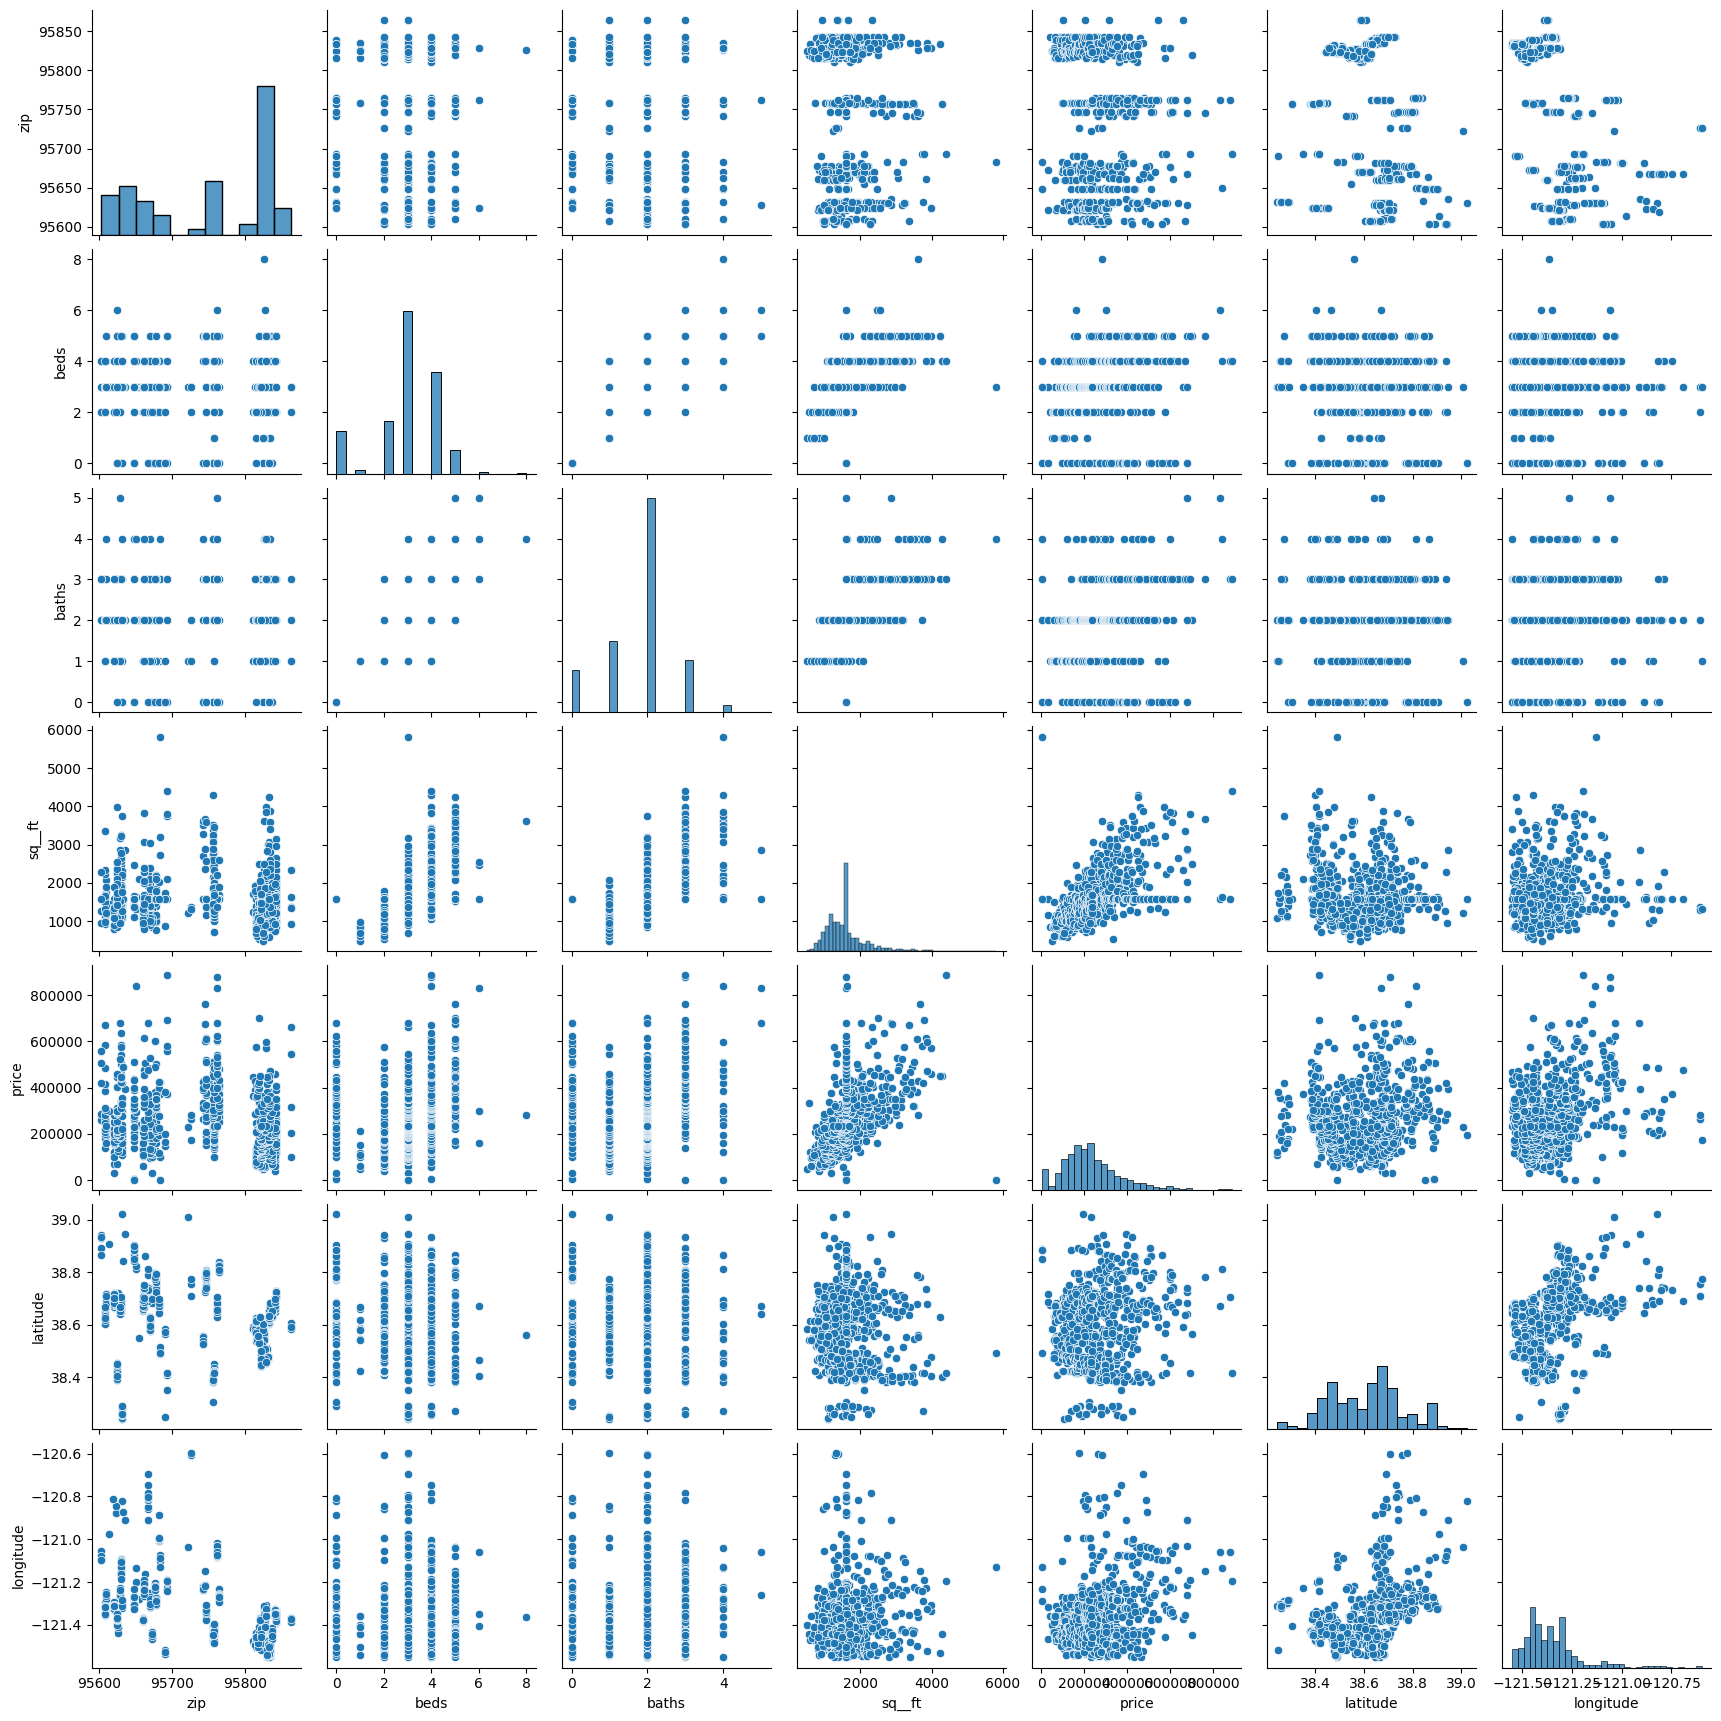

In [102]:
sns.pairplot(house)

In [119]:
#Find correlationhouse_corr = house.corr(numeric_only = True)
house_corr

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,-0.092497,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.412003,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.492730,0.416208,-0.235792,0.016582
sq__ft,-0.092497,0.412003,0.492730,1.000000,0.546066,-0.081543,0.106893
price,-0.093353,0.342024,0.416208,0.546066,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.081543,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,0.106893,0.284485,0.387925,1.000000


<Axes: >

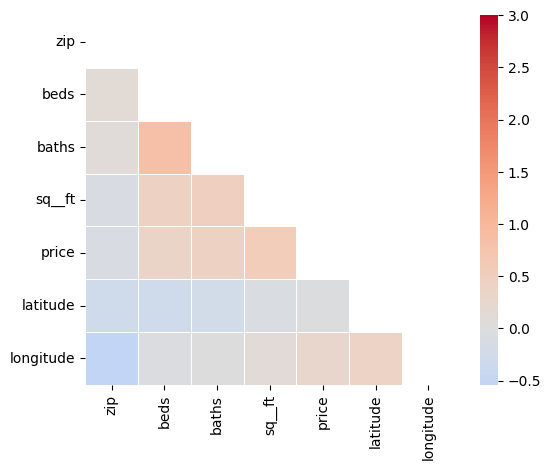

In [121]:
mask=np.triu(np.ones_like(house_corr, dtype=bool))
sns.heatmap(house_corr, mask=mask, vmax=3, center=0, square=True, linewidths=0.5, cmap="coolwarm")

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [5]:
# ANSWER
#price

#### 2.2 List all possible variables which might be Predictor variable.

In [16]:
# ANSWER
#number of beds, baths
#sq_feet

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [48]:
# ANSWER
#price - has the greatest correlation

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [ ]:
# ANSWER
#Using linear regression

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [106]:
# ANSWER
#res = abs(house.actual-house.predicted).mean()


#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [107]:
# ANSWER
X = house.sq__ft
Y = house.price

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [111]:
# ANSWER
def calculate_beta_1(x, y):
    xbar = x.mean()
    ybar = y.mean()
    
    num=np.sum((y - ybar)*(x - xbar))
    den=np.sum(np.square(x-xbar))
    
    beta_1 = num/den
    
    return beta_1

In [112]:
beta_1 = calculate_beta_1(X,Y)
beta_1

125.21648667984462

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [124]:
def calculate_beta_0(x,y):
    ybar = y.mean()
    xbar = x.mean()
    beta_0 = ybar - calculate_beta_1(x,y)*xbar
    
    return beta_0

In [125]:
# ANSWER
beta_0 = calculate_beta_0(X,Y)
beta_0

34906.52804744002

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [127]:
# ANSWER
yhat = beta_0+beta_1*X
yhat

0      139587.510912
1      181034.168003
2      134578.851445
3      141590.974699
4      134704.067931
           ...      
980    320400.117677
981    219851.278874
982    187169.775850
983    245896.308103
984    205451.382905
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [129]:
# ANSWER
res= Y-yhat
res

0      -80365.510912
1     -112822.168003
2      -65698.851445
3      -72283.974699
4      -52804.067931
           ...      
980    -87975.117677
981     14148.721126
982     47830.224150
983    -10595.308103
984     30286.617095
Length: 985, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [130]:
# ANSWER
def total_sum_of_squares(y):
    ybar = np.mean(y)
    ssind = np.square(y-ybar)
    sstot = np.sum(ssind)
    
    return sstot

def residual_sum_of_squares(y, yhat):
    ssind = np.square(y-yhat)
    ssres = np.sum(ssind)

    return ssres

def r_square(y, yhat):
    sstot = total_sum_of_squares(y)
    ssres = residual_sum_of_squares(y, yhat)
    rsquare = 1 - (ssres/sstot)
    
    return rsquare

##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [ ]:
# ANSWER

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

In [ ]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [133]:
# ANSWER
sqft_pred =1204

price_pred = beta_0 + sqft_pred*beta_1
price_pred

185667.17800997294



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



